In [2]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.finnhub.data import FinnhubData as finnhub
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [3]:
ticker = 'GE'

fh = finnhub()
data = fh.get_historical_data(ticker, fh.get_daily_closings, days = 180)

data.index = data['t']
data.sort_index()
data.drop_duplicates()

,t,o,l,h,c,v
t,,,,,,
2020-09-16 20:00:00,2020-09-16 20:00:00,6.71,6.76,6.76,6.80,8080061
2020-09-17 20:00:00,2020-09-17 20:00:00,7.01,7.05,7.05,7.07,7910344
2020-09-18 20:00:00,2020-09-18 20:00:00,6.86,6.90,6.88,6.90,15799114
2020-09-21 20:00:00,2020-09-21 20:00:00,6.33,6.35,6.34,6.36,7714526
2020-09-22 20:00:00,2020-09-22 20:00:00,6.23,6.25,6.25,6.26,5003177
...,...,...,...,...,...,...
2021-03-09 21:00:00,2021-03-09 21:00:00,13.99,13.99,14.08,14.10,7534221
2021-03-10 21:00:00,2021-03-10 21:00:00,13.08,13.25,13.13,13.26,4944311
2021-03-11 21:00:00,2021-03-11 21:00:00,12.16,12.27,12.21,12.30,1917539


In [4]:
# refresh data for today
fh.get_daily_closings(ticker, datetime.today(), include_ah = datetime.now() > datetime.now().replace(hour=22, minute = 0, second = 0, microsecond =0))

,t,o,l,h,c,v
0,2021-03-15 20:00:00,12.73,13.35,13.33,13.36,732055


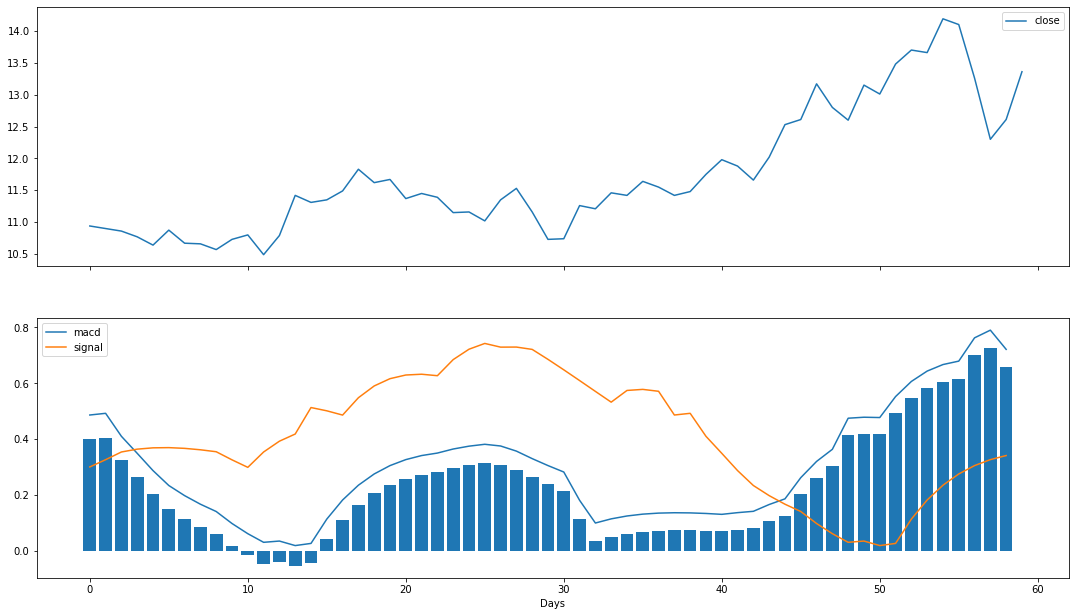

In [7]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

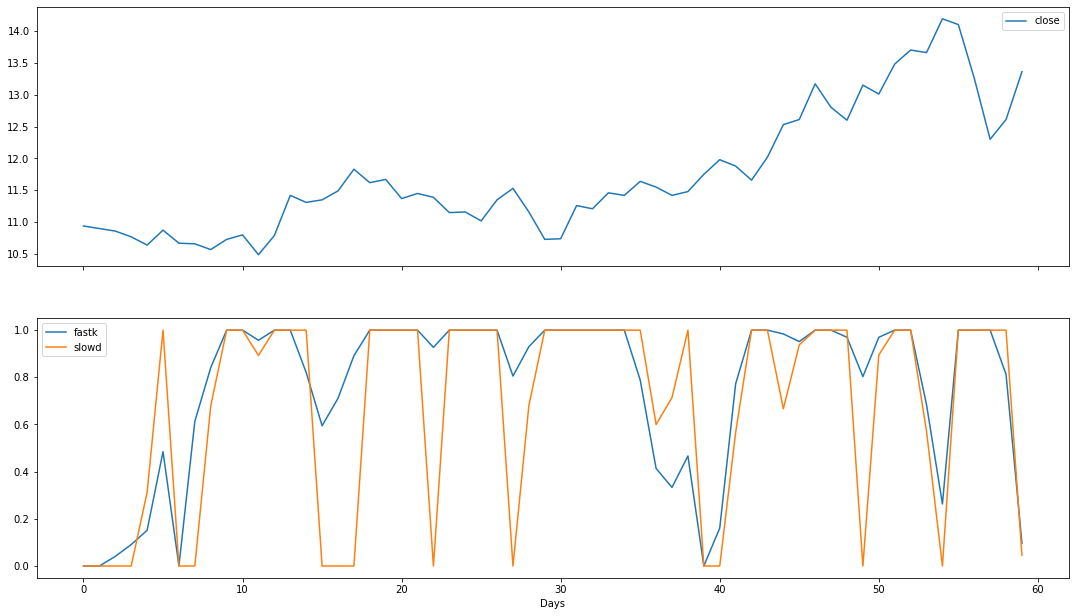

In [6]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)